In [1]:
%pip install numpy matplotlib scipy matlab

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt


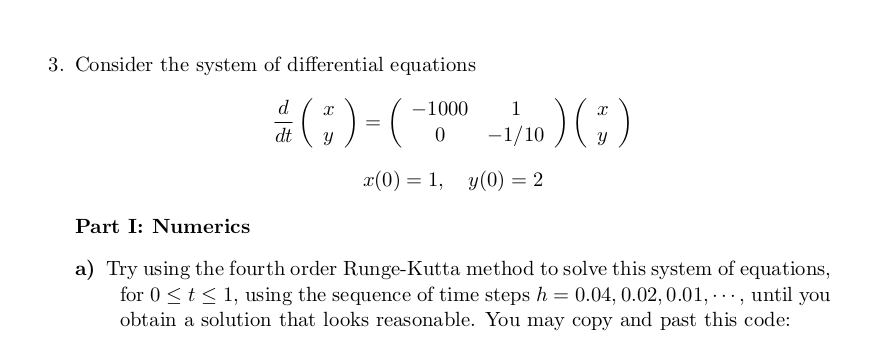

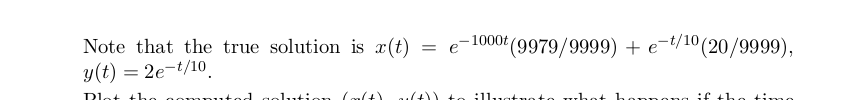

In [3]:
def solve_and_plot_with_runge_kutta_4(h):
    def exact_solution(t):
        '''This function returns the exact solution of the differential equation'''
        x = np.exp(-1000*t) * (9979/9999) + np.exp(-t/10) * (20/9999)
        y = 2 * np.exp(-t/10) 
        return x, y
    #use our runge_kutta_4th_order function to solve the differential equation
    def ddtxy(t, XY):
        '''This function returns the derivative of x and y at time t'''
        A = np.array([[-1000, 1],
                    [0, -1/10]])
        dXYdt = A @ XY
        return dXYdt
    def runge_kutta_4th_order(t, XY, h, f):
        '''This function returns the value of the function at t + h'''
        #intermediate slope estimations
        k1 = f(t, XY)
        k2 = f(t + h/2, XY + h/2 * k1)
        k3 = f(t + h/2, XY + h/2 * k2)
        k4 = f(t + h, XY + h * k3)
        #update the value of the function
        XY_next = XY + ((h/6) * (k1 + 2*k2 + 2*k3 + k4))
        return XY_next
    t = 0
    t_values = [t]
    x0 = 1
    y0 = 2
    xy0 = np.array([x0, y0])
    XY_values = [xy0]
    while t < 1:
        '''This loop solves the differential equation using the runge_kutta_4th_order function'''
        t_values.append(t)
        xy0 = runge_kutta_4th_order(t, xy0, h, ddtxy)
        # print(xy0)
        XY_values.append(xy0)
        t += h
    #plot the results
    XY_values = np.array(XY_values)
    plt.plot(t_values, XY_values[:, 0], label='x approx')
    plt.plot(t_values, XY_values[:, 1], label='y approx')
    #plot the exact solution
    plt.plot(t_values, [exact_solution(t)[0] for t in t_values], label='x exact', linestyle='--')
    plt.plot(t_values, [exact_solution(t)[1] for t in t_values], label='y exact', linestyle='--')
    plt.xlabel('t, h = {}'.format(h))
    plt.ylabel('x and y')
    # plt.yscale('log')   
    
    plt.legend()
    plt.show()

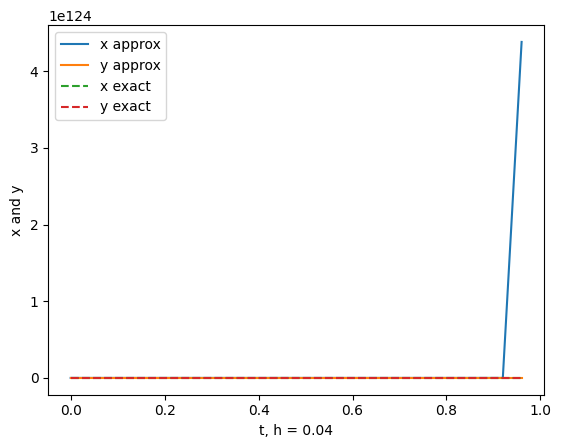

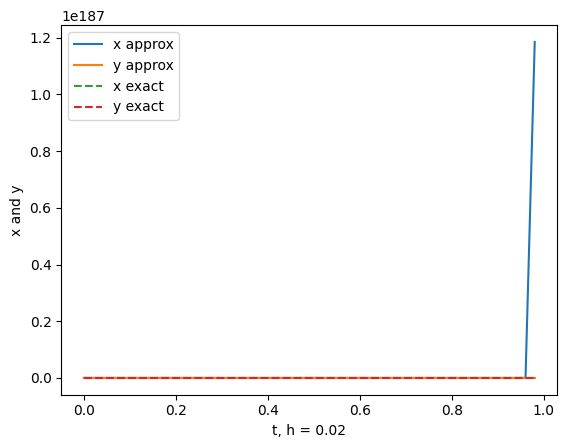

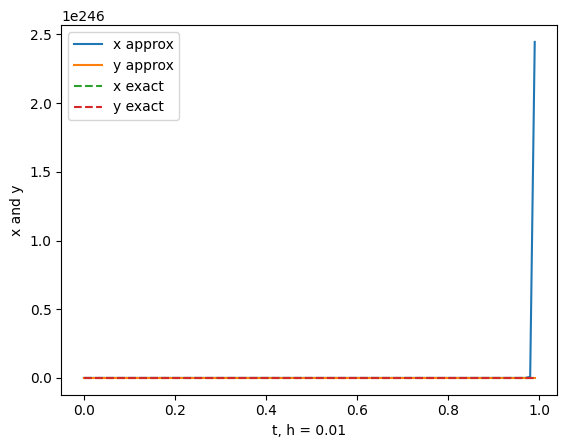

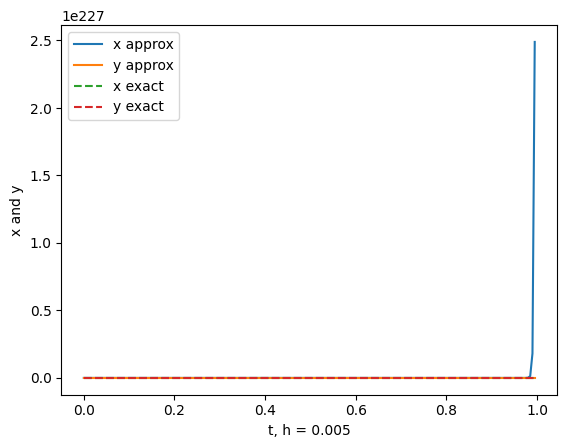

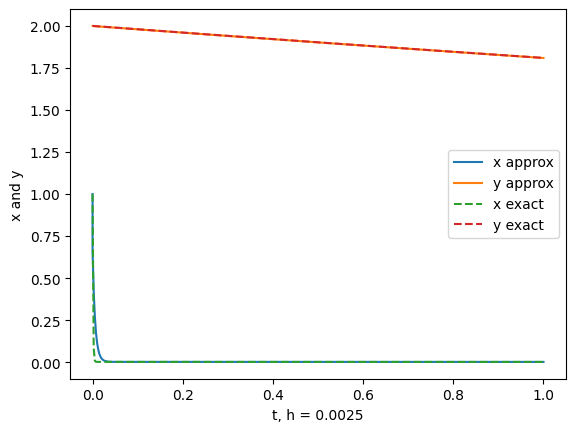

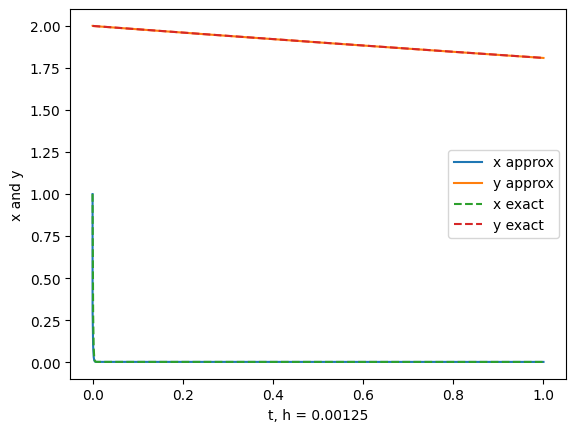

In [4]:
h_array = [0.04/(2**i) for i in range(6)]
for h in h_array:
    solve_and_plot_with_runge_kutta_4(h)

In [5]:
def solve_and_plot_with_adam_moulton_2(h):
    def exact_solution(t):
        '''This function returns the exact solution of the differential equation'''
        x = np.exp(-1000*t) * (9979/9999) + np.exp(-t/10) * (20/9999)
        y = 2 * np.exp(-t/10) 
        return x, y
    #use our runge_kutta_4th_order function to solve the differential equation
    def ddtxy(xy):
        '''This function returns the derivative of x and y at time t'''
        A = np.array([[-1000, 1],
                    [0, -1/10]])
        dXYdt = A @ xy
        return dXYdt
    
    def adam_moulton_2(t, xy, h, f):
        '''This function returns the value of the function at t + h'''
        #solved analytically for next values of x and y
        x, y = xy
        x_next = 1/(500*h + 1) * (x - 500*h*x + h*y)
        y_next = 1/(1 + h/20)*(y - (h/20)*y)
        xy_next = np.array([x_next, y_next])
        f_next_approx = f(xy_next)
        xy_next = xy + (h/2) * (f_next_approx + f(xy))
        return xy_next
    t = h
    t_values = [t]
    x0 = 1
    y0 = 2
    xy0 = np.array([x0, y0])
    XY_values = [xy0]
    while t < 1:
        '''This loop solves the differential equation using the adam_moulton_2 function'''
        t_values.append(t)
        xy0 = adam_moulton_2(t, xy0, h, ddtxy)
        XY_values.append(xy0)
        t += h
    #plot the results
    XY_values = np.array(XY_values)
    plt.plot(t_values, XY_values[:, 0], label='x approx')
    plt.plot(t_values, XY_values[:, 1], label='y approx')
    #plot the exact solution
    plt.plot(t_values, [exact_solution(t)[0] for t in t_values], label='x exact', linestyle='--')
    plt.plot(t_values, [exact_solution(t)[1] for t in t_values], label='y exact', linestyle='--')
    plt.xlabel('t, h = {}'.format(h))
    plt.ylabel('x and y')
    # plt.yscale('log')
    plt.legend()
    plt.show()
    
    

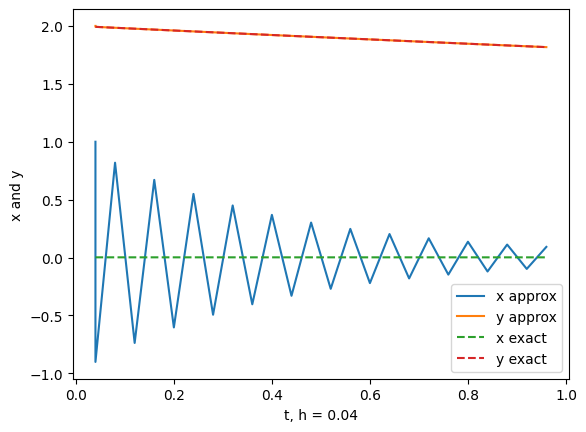

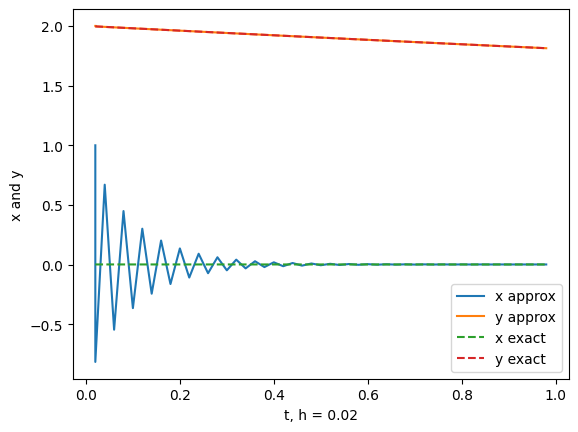

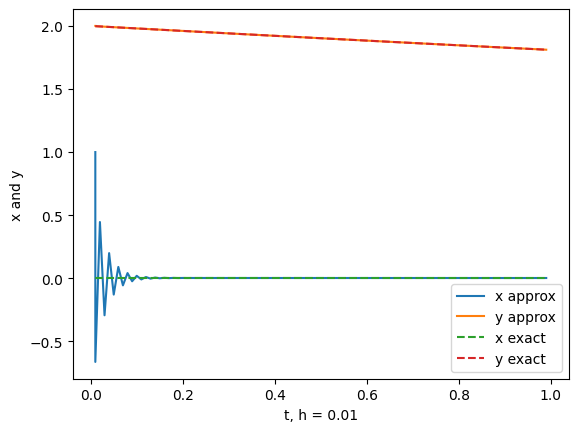

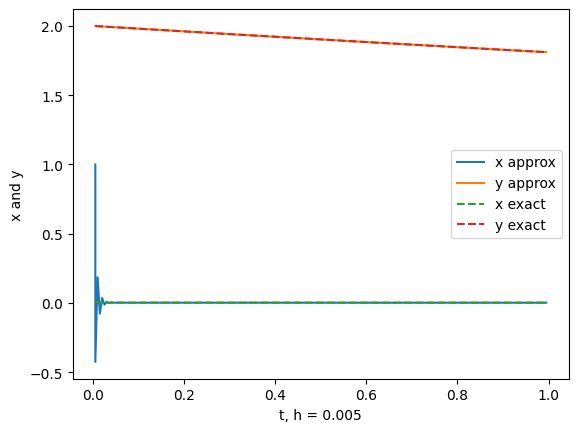

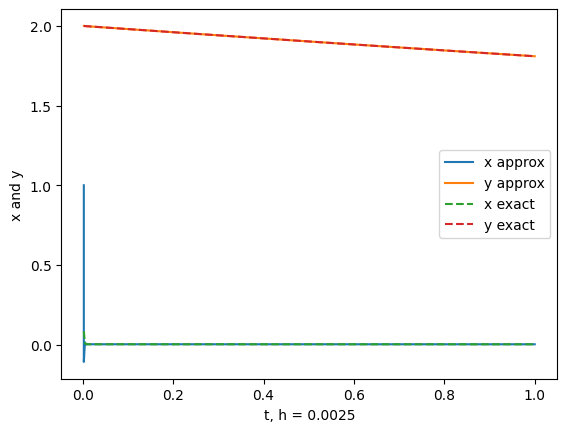

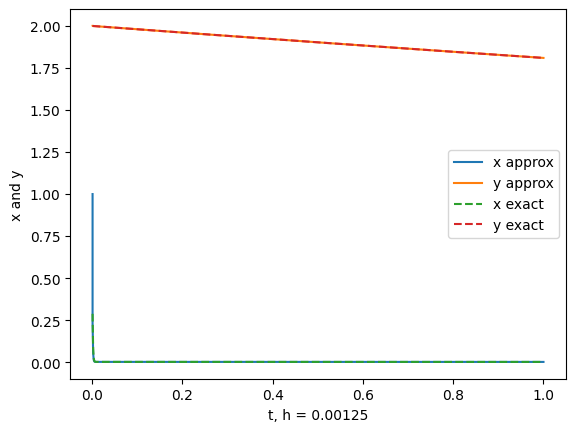

In [6]:
h_array = [0.04/(2**i) for i in range(6)]
for h in h_array:
    solve_and_plot_with_adam_moulton_2(h)

In [7]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt

def solve_and_plot_with_matlab_ode23(h):
    def exact_solution(t):
        '''This function returns the exact solution of the differential equation'''
        x = np.exp(-1000*t) * (9979/9999) + np.exp(-t/10) * (20/9999)
        y = 2 * np.exp(-t/10)
        return x, y
    
    # Start MATLAB engine
    eng = matlab.engine.start_matlab()
    
    # Define the ODE system in MATLAB syntax
    eng.eval("f = @(t, xy) [-1000*xy(1) + xy(2); -1/10*xy(2)];", nargout=0)
    
    # Time span and initial conditions
    tspan = matlab.double([0, 1])  # From t=0 to t=1
    xy0 = matlab.double([1, 2])    # Initial conditions [x0, y0]
    
    # Solve the system using ode23
    t, xy = eng.ode23("f", tspan, xy0, nargout=2)
    
    # Convert MATLAB types to Python types
    t = [val for val in t]
    xy = np.array(xy).T  # Transpose to get a 2D array matching Python's expectations
    
    # Stop MATLAB engine
    eng.quit()
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, xy[:, 0], label='x approx')
    plt.plot(t, xy[:, 1], label='y approx')
    
    # Plot the exact solution
    t_fine = np.linspace(0, 1, 100)
    exact_x, exact_y = exact_solution(t_fine)
    plt.plot(t_fine, exact_x, label='x exact', linestyle='--')
    plt.plot(t_fine, exact_y, label='y exact', linestyle='--')
    
    plt.xlabel('t')
    plt.ylabel('x and y')
    plt.legend()
    plt.title(f'Solution with MATLAB ode23 and h={h}')
    plt.show()

# Example usage
h = 0.01  # Step size
solve_and_plot_with_matlab_ode23(h)


ModuleNotFoundError: No module named 'matlab.engine'; 'matlab' is not a package